In [2]:
f = open("time_optimized_0_100.txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

In [3]:
l

[['0__0.xml', '0'],
 ['1__0.xml', '0'],
 ['2_0.000000_0.xml', '4.0K'],
 ['Tarjan',
  '0.000004s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Nuutila',
  '0.000002s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Pearce',
  '0.000002s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Components:', '2'],
 ['Correct:', '1'],
 ['2_0.500000_2.xml', '4.0K'],
 ['Tarjan',
  '0.000004s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Nuutila',
  '0.000003s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Pearce',
  '0.000002s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)'],
 ['Comp

In [4]:
ll = []
i=0
['Tarjan',
  '0.000004s',
  'wall,',
  '0.000000s',
  'user',
  '+',
  '0.000000s',
  'system',
  '=',
  '0.000000s',
  'CPU',
  '(n/a%)']
while i< len(l):
    if "__" in l[i][0]:
        i+=1
    else:
        try:
            v, p, e = l[i][0][:-4].split("_")
            ll.append([int(v), float(p), int(e), float(l[i+1][1][:-1]), float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), int(l[i+4][1]), int(l[i+5][1])])
        except:
            print(l[i][0][:-4].split("_"))
        i+=6
ll[:3]

[[2, 0.0, 0, 4e-06, 2e-06, 2e-06, 2, 1],
 [2, 0.5, 2, 4e-06, 3e-06, 2e-06, 1, 1],
 [2, 1.0, 2, 5e-06, 3e-06, 3e-06, 1, 1]]

In [5]:
import csv
f = open("time_optimized_0_100.csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

In [6]:
import pandas as pd

In [7]:
t = pd.read_csv("time_optimized_0_100.csv")
t = t[["vertices","percentage","edges", "tarjan", "nuutila", "pearce"]].groupby(by=["vertices","percentage","edges"], as_index=False).mean()

In [8]:
t["v+e"]=t["vertices"]+t["edges"]

In [9]:
#for n in ["tarjan", "nuutila", "pearce"]:
#    t[n] = t[n]/t["v+e"]

In [10]:
t.describe()

,vertices,percentage,edges,tarjan,nuutila,pearce,v+e
count,70904.000000,70904.000000,70904.000000,70904.000000,70904.000000,70904.000000,70904.000000
mean,55.640570,0.499929,1346.328529,0.011332,0.011987,0.011656,1401.969099
std,24.014507,0.289044,1372.088245,0.014787,0.014833,0.014907,1390.772411
min,2.000000,0.000000,0.000000,0.000004,0.000002,0.000002,2.000000
25%,38.000000,0.249682,366.000000,0.001745,0.001949,0.001846,407.000000
50%,48.000000,0.500000,835.000000,0.004202,0.005252,0.004469,884.000000
75%,78.000000,0.750156,1854.000000,0.016031,0.016985,0.016739,1928.000000
max,100.000000,1.000000,6344.000000,0.103510,0.109089,0.112531,6444.000000


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd327cfc630>,
      dtype=object)

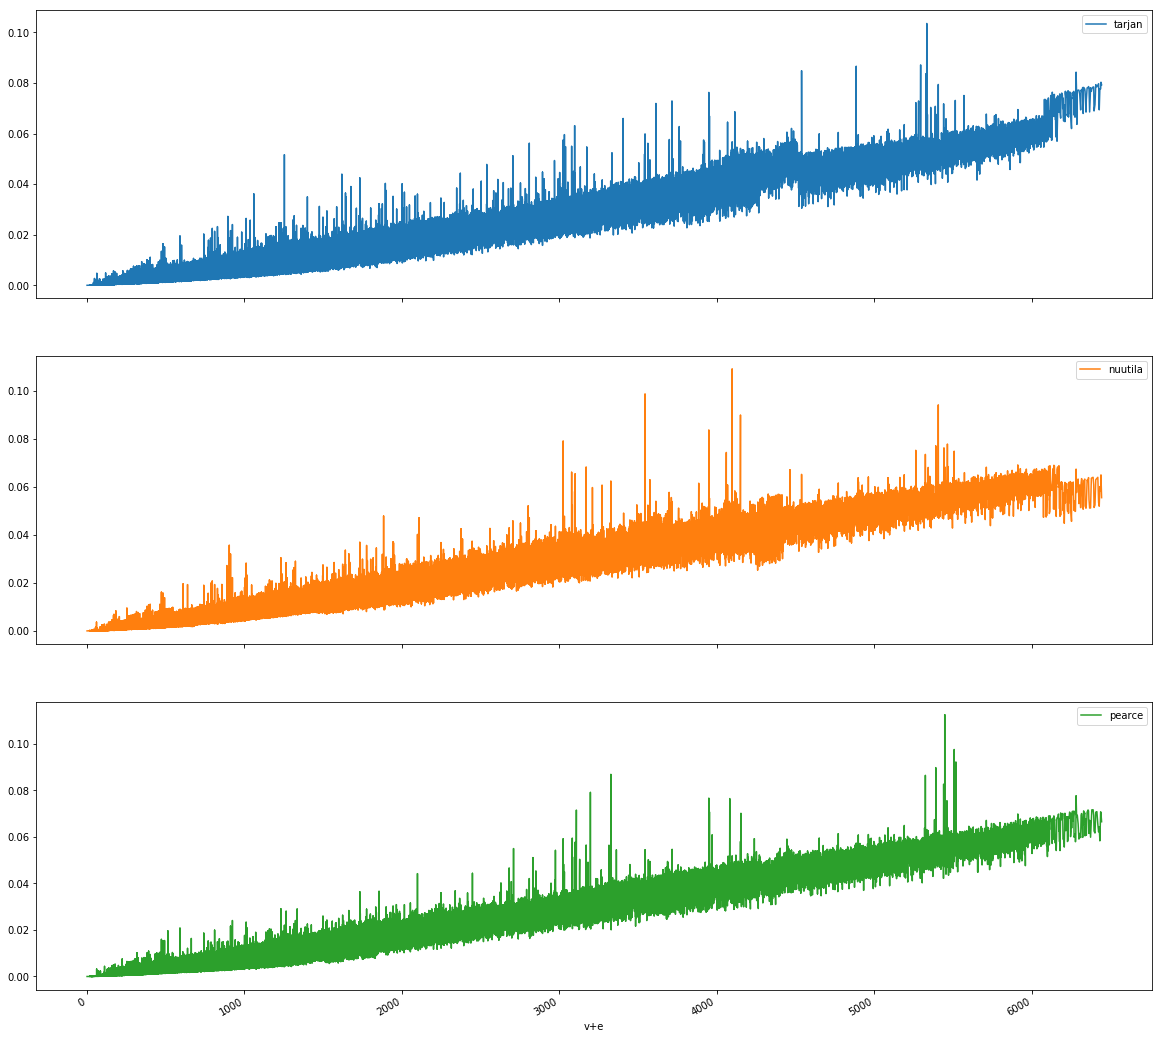

In [11]:
t = t.sort_values(by=["v+e","vertices","edges"])
t.plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd328132c88>,
      dtype=object)

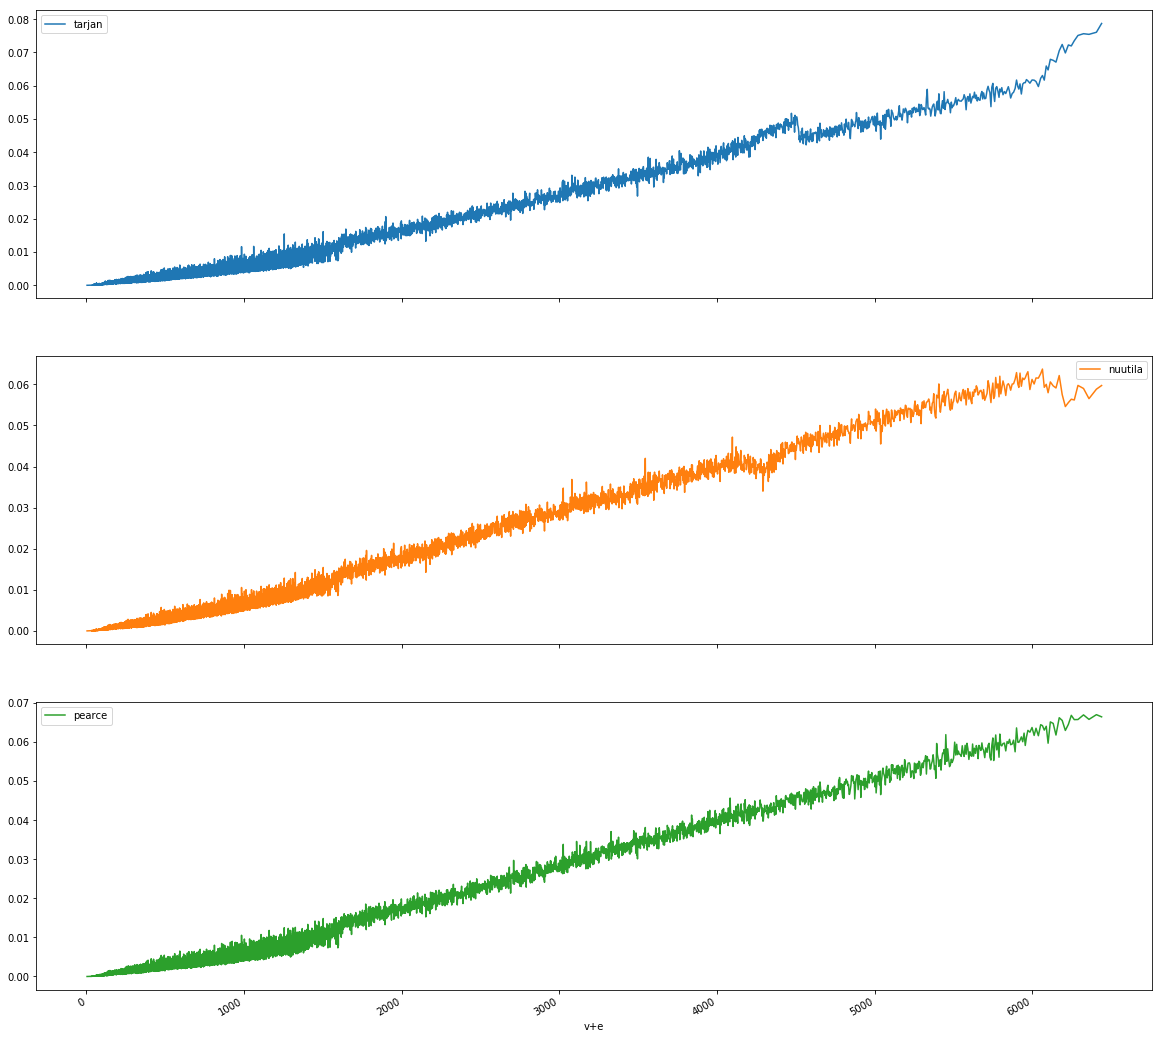

In [12]:
t = t.sort_values(by=["v+e","vertices","edges"])
t.groupby(np.arange(len(t))//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3280a44a8>,
      dtype=object)

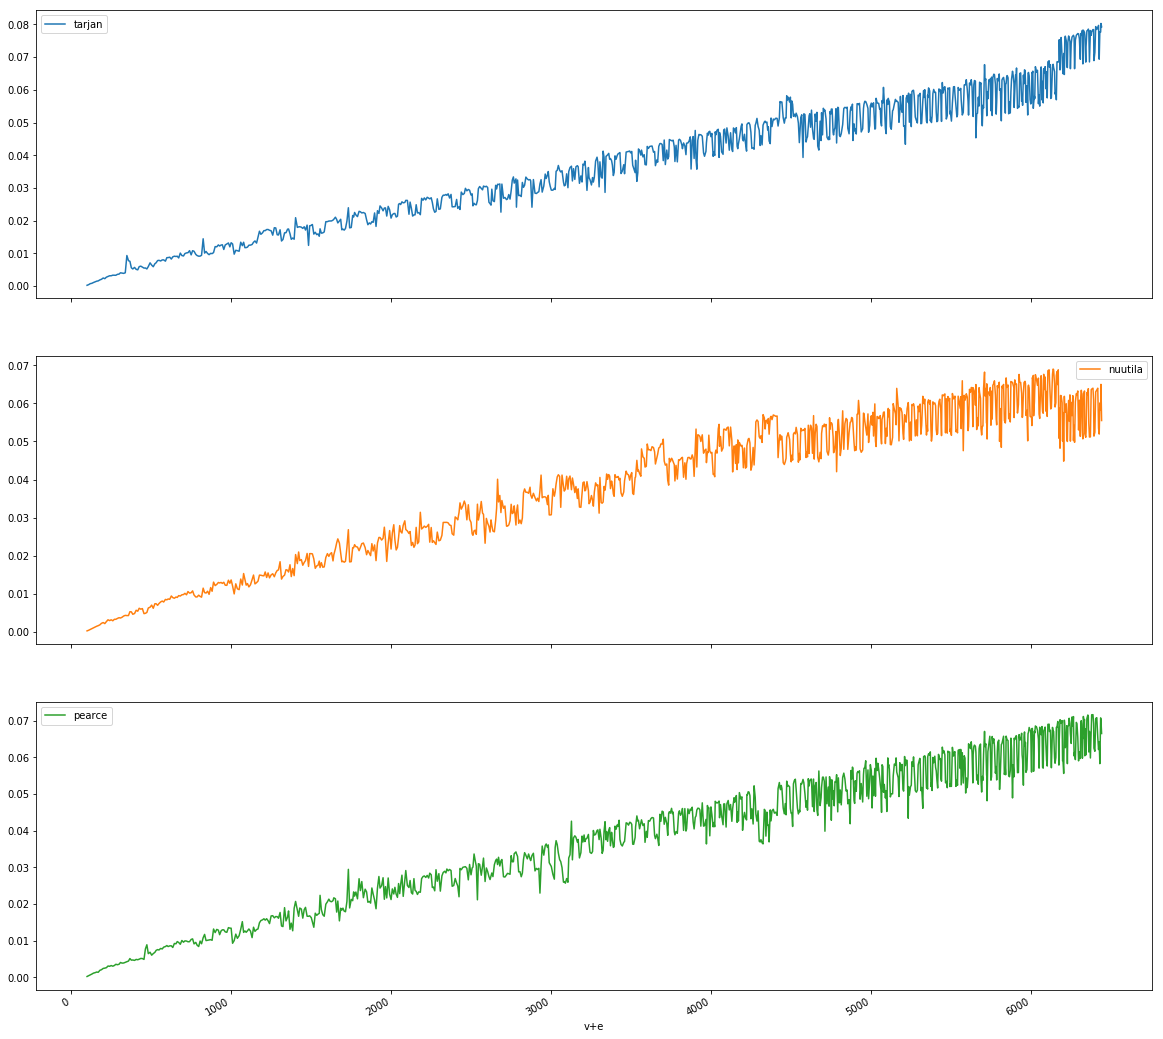

In [13]:
t[t.vertices==100].plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

In [14]:
3//4

0

/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/lib64/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


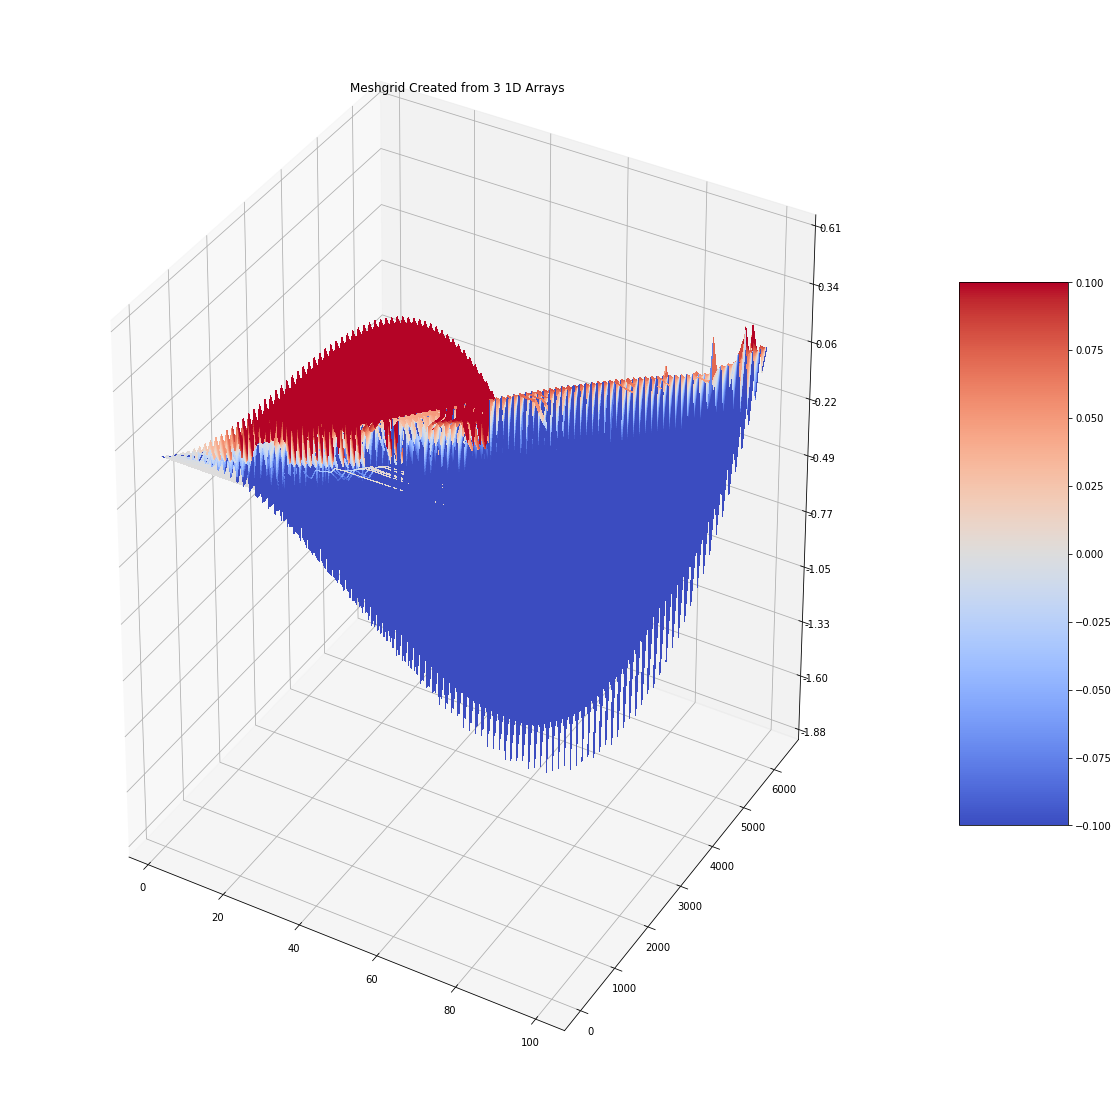

In [15]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
df=t
x1 = np.linspace(df['vertices'].min(), df['vertices'].max(), len(df['vertices'].unique()))
y1 = np.linspace(df['edges'].min(), df['edges'].max(), len(df['edges'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

# Ready to plot
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Meshgrid Created from 3 1D Arrays')

plt.show()

#Modified example using <code>DataFrame</code> input